In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Card Extraction

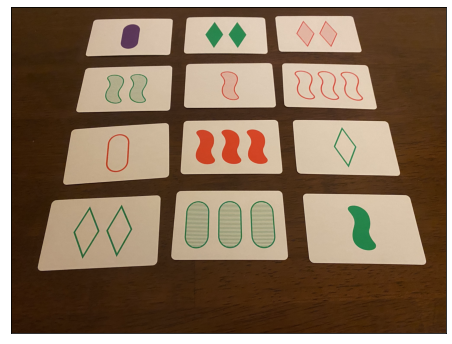

In [222]:
im = cv2.imread('images/Misc/originals/IMG_18.png')
# im = cv2.imread('test4.png')
plt.figure(figsize=(8, 6)) 
fig = plt.imshow(im[:,:,[2,1,0]])
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

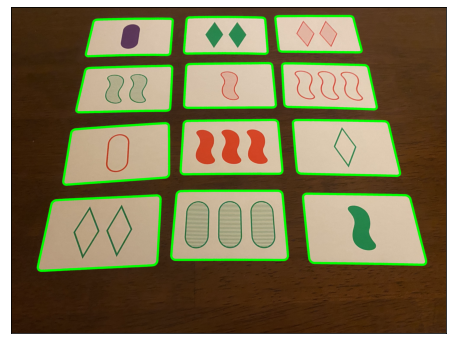

In [223]:
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# test = cv2.drawContours(im, contours[8:16], -1, (0,255,0), 3)
test = cv2.drawContours(im, contours, -1, (0,255,0), 20)
plt.figure(figsize=(8, 6)) 
fig = plt.imshow(im[:,:,[2,1,0]])
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

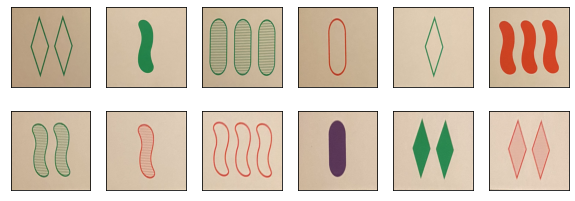

In [224]:
def rectify(h):
    h = h.reshape((4,2))
    hnew = np.zeros((4,2),dtype = np.float32)

    add = h.sum(1)
    hnew[0] = h[np.argmin(add)]
    hnew[2] = h[np.argmax(add)]
   
    diff = np.diff(h,axis = 1)
    hnew[1] = h[np.argmin(diff)]
    hnew[3] = h[np.argmax(diff)]
    return hnew

def getCards(im, numcards=12):
    gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(1,1),1000)
    flag, thresh = cv2.threshold(blur, 120, 255, cv2.THRESH_BINARY) 
       
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    contours = sorted(contours, key=cv2.contourArea,reverse=True)[:numcards]  

    plt.figure(figsize=(10, 3.5)) 
    for idx, card in enumerate(contours):
        peri = cv2.arcLength(card,True)
        approx = rectify(cv2.approxPolyDP(card,0.02*peri,True))  
    
        h = np.array([ [0,0],[449,0],[449,449],[0,449] ],np.float32)

        transform = cv2.getPerspectiveTransform(approx,h)
        warp = cv2.warpPerspective(im,transform,(450,450))
#             
        plt.subplot(2,6,idx+1); fig = plt.imshow(warp[:,:,[2,1,0]])
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)


# im = cv2.imread('game1.png')
image = cv2.imread('images/Misc/originals/IMG_18.png')

getCards(image)

In [77]:
def extractCards(image_num, numcards=12):
    im = cv2.imread('images/IMG_' + str(image_num) + '.png')  
    gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(1,1),1000)
    flag, thresh = cv2.threshold(blur, 120, 255, cv2.THRESH_BINARY) 
       
    contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

    contours = sorted(contours, key=cv2.contourArea,reverse=True)[:numcards]  

    for idx, card in enumerate(contours):
        peri = cv2.arcLength(card,True)
        approx = rectify(cv2.approxPolyDP(card,0.02*peri,True))  
    
        h = np.array([ [0,0],[511,0],[511,511],[0,511] ],np.float32)

        transform = cv2.getPerspectiveTransform(approx,h)
        warp = cv2.warpPerspective(im,transform,(512,512))
        plt.imshow(warp[:,:,[2,1,0]])
        plt.imsave('images/cards/' +'card_'+ str(image_num) + '_' + str(idx) +'.png', warp[:,:,[2,1,0]])
#       plt.subplot(4,3,idx+1); plt.imshow(warp[:,:,[2,1,0]])
   

# for i in range(32,57):    
#     extractCards(i)
# 30, 32, 34, 36, 38, 40, 42, 46, 54 
# 52_0 -- didn't work either

extractCards(32)

ValueError: cannot reshape array of size 12 into shape (4,2)

(512, 512, 3)

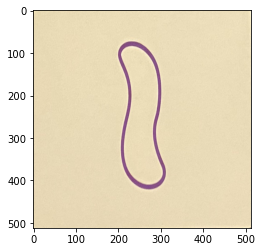

In [26]:
image = cv2.imread('newdir/testcard1.png')    
plt.imshow(image[:,:,[2,1,0]])

image.shape

In [78]:
cv2

<module 'cv2' from '/Users/andrei/opt/anaconda3/envs/setsolver/lib/python3.8/site-packages/cv2.cpython-38-darwin.so'>

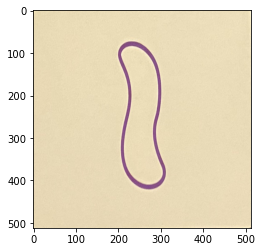

In [33]:
images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
plt.imshow(images[0][:,:,[2,1,0]])


In [30]:
images.shape

(1, 512, 512, 3)

## Hand Labeling Scripts

In [80]:
CARD_ATTRS = {
  'shading': ['outlined', 'striped', 'solid'],
  'color': ['red', 'green', 'purple'],
  'number': ['one', 'two', 'three'],
  'shape': ['diamond', 'oval', 'squiggle', ]
}

d = {}



i = 2
j = 8
name = 'card_' + str(i) + '_' + str(j) + '.png'
d[name] = {}
d[name]['shading'] = 'solid'
d[name]['color'] = 'red'
# card = (2,8)
d



{'card_2_8.png': {'shading': 'solid', 'color': 'red'}}

In [109]:
def label_by_hand(card):
    """Display a card to the user, who can then label the:
      - shade: solid, stripes, outline
      - color: red, green, purple
      - number: single, double, triple
      - shape: diamond, squiggle, capsule
      and the image will be saved with the signifying filename.
      """
    im = cv2.imread(card)
    plt.imshow(im[:,:,[2,1,0]])
    plt.show()
    
    tokens = []
    for attr in sorted(CARD_ATTRS.keys()):
        prompt = "Enter the card's {}:\n||".format(attr.upper())
        for i, option in enumerate(CARD_ATTRS[attr]):
            prompt += " For {}, enter '{}'  ||".format(option.upper(), i+1)
        print(prompt)
        x = input()
        tokens.append(x)
    return tokens
    

TypeError: list indices must be integers or slices, not str

In [132]:
import pandas as pd
import numpy as np

CARD_ATTRS = {
  'shading': ['outlined', 'striped', 'solid'],
  'color': ['red', 'green', 'purple'],
  'number': ['one', 'two', 'three'],
  'shape': ['diamond', 'oval', 'squiggle']
}

df = pd.DataFrame(columns = ['id','shading', 'color', 'number', 'shape'])
# df.set_index('id', inplace=True)

# record = {'id':'d1', 'shading':2, 'color':3, 'number':4, 'shape':5}
record = {}
record['id']= 'd1'
record['shading']= 'd1'
record['color']= 'd3'
# record['number']= 'd1'
record['shape']= 'd1'

df = df.append(record, ignore_index = True)
df

# df2 = {'Name': 'Amy', 'Maths': 89, 'Science': 93}
# df = df.append(df2, ignore_index = True)

,id,shading,color,number,shape
0,d1,d1,d3,NaN,d1


In [ ]:


def label_by_hand(card):
    """Display a card to the user, who can then label the:
      - shade: solid, stripes, outline
      - color: red, green, purple
      - number: single, double, triple
      - shape: diamond, squiggle, capsule
      and the image will be saved with the signifying filename.
      """
    im = cv2.imread(card)
    plt.imshow(im[:,:,[2,1,0]])
    plt.show()
    
    tokens = []
    for attr in sorted(CARD_ATTRS.keys()):
        prompt = "Enter the card's {}:\n||".format(attr.upper())
        for i, option in enumerate(CARD_ATTRS[attr]):
            prompt += " For {}, enter '{}'  ||".format(option.upper(), i+1)
        print(prompt)
        x = input()
        tokens.append(x)
    return tokens
    
# _ = label_by_hand('newdir/testcard1.png')

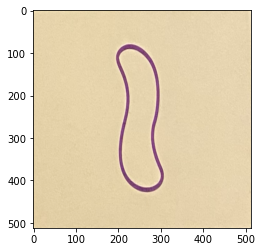

Enter the card's COLOR:
|| For RED, enter '1'  || For GREEN, enter '2'  || For PURPLE, enter '3'  ||
1
Enter the card's NUMBER:
|| For ONE, enter '1'  || For TWO, enter '2'  || For THREE, enter '3'  ||
3
Enter the card's SHADING:
|| For OUTLINED, enter '1'  || For STRIPED, enter '2'  || For SOLID, enter '3'  ||
5
Enter the card's SHAPE:
|| For DIAMOND, enter '1'  || For OVAL, enter '2'  || For SQUIGGLE, enter '3'  ||
6


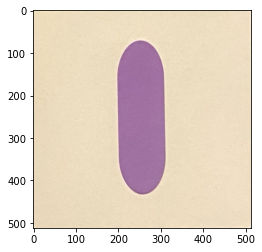

Enter the card's COLOR:
|| For RED, enter '1'  || For GREEN, enter '2'  || For PURPLE, enter '3'  ||
j
Enter the card's NUMBER:
|| For ONE, enter '1'  || For TWO, enter '2'  || For THREE, enter '3'  ||
j
Enter the card's SHADING:
|| For OUTLINED, enter '1'  || For STRIPED, enter '2'  || For SOLID, enter '3'  ||
j
Enter the card's SHAPE:
|| For DIAMOND, enter '1'  || For OVAL, enter '2'  || For SQUIGGLE, enter '3'  ||
j


In [121]:
d = []

for i in range(1,3):
    filename = 'newdir/testcard' + str(i) + '.png'
    label = label_by_hand(filename)
    d.append(label)

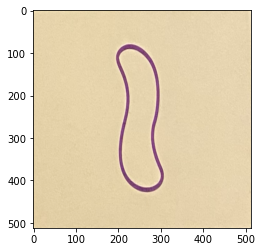

Select the window with the card image when entering keys. Keys entered here will not be registered.
Enter the card's COLOR:
  For RED, enter '1'
  For GREEN, enter '2'
  For PURPLE, enter '3'

3
Enter the card's NUMBER:
  For ONE, enter '1'
  For TWO, enter '2'
  For THREE, enter '3'

1
Enter the card's SHADING:
  For OUTLINED, enter '1'
  For STRIPED, enter '2'
  For SOLID, enter '3'

1
Enter the card's SHAPE:
  For DIAMOND, enter '1'
  For OVAL, enter '2'
  For SQUIGGLE, enter '3'

3


In [104]:
d = []

for i in range(1,2):
    filename = 'newdir/testcard' + str(i) + '.png'
    label = label_and_save(filename)
    d.append(label)

In [103]:
d

[['3', '1', '1', '3'], ['3', '1', '3', '2'], ['3', '2', '1', '4']]

## Data Augmentation - Rotations

In [140]:
!ls images/

Misc    color   number  shading shape


In [141]:
import os
import random
import shutil

In [155]:
# source = 'images/shape/train/squiggle/'
# dest = 'images/shape/test/squiggle/'
# files = os.listdir(source)
# no_of_files = len(files) // 5

# for file_name in random.sample(files, no_of_files):
#     shutil.move(os.path.join(source, file_name), dest)

(512, 512, 3)

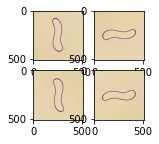

In [163]:
image = cv2.imread('newdir/testcard1.png') 
image_rot1 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
image_rot2 = cv2.rotate(image_rot1, cv2.ROTATE_90_CLOCKWISE)
image_rot3 = cv2.rotate(image_rot2, cv2.ROTATE_90_CLOCKWISE)

plt.figure(figsize=(2,2))
plt.subplot(2,2,1)
plt.imshow(image[:,:,[2,1,0]])
plt.subplot(2,2,2)
plt.imshow(image_rot1[:,:,[2,1,0]])
plt.subplot(2,2,3)
plt.imshow(image_rot2[:,:,[2,1,0]])
plt.subplot(2,2,4)
plt.imshow(image_rot3[:,:,[2,1,0]])

image_rot1.shape

In [197]:
from scipy import ndimage
import os


# Run this in each subdirectory
path = "images/shape/train/squiggle/"

def main():
    for image_name in os.listdir(path):
        try:
            print(path + image_name)
            image = cv2.imread(path + image_name) 
            image_rot1 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
            image_rot2 = cv2.rotate(image_rot1, cv2.ROTATE_90_CLOCKWISE)
            image_rot3 = cv2.rotate(image_rot2, cv2.ROTATE_90_CLOCKWISE)
#             plt.imshow(image_rot1[:,:,[2,1,0]])
            plt.imsave(path + 'rot90_' + image_name, image_rot1[:,:,[2,1,0]])
            plt.imsave(path + 'rot180_' + image_name, image_rot2[:,:,[2,1,0]])
            plt.imsave(path + 'rot270_' + image_name, image_rot3[:,:,[2,1,0]])
        except:
            continue

#         rotated = ndimage.rotate(image_to_rotate, 45)
#         fullpath = os.path.join(outPath, rotated)
main()

images/shape/train/squiggle/card_55_6.png
images/shape/train/squiggle/card_53_0.png
images/shape/train/squiggle/card_14_2.png
images/shape/train/squiggle/card_14_3.png
images/shape/train/squiggle/card_6_1.png
images/shape/train/squiggle/card_16_1.png
images/shape/train/squiggle/card_7_10.png
images/shape/train/squiggle/card_4_3.png
images/shape/train/squiggle/card_29_1.png
images/shape/train/squiggle/card_36_6.png
images/shape/train/squiggle/card_10_5.png
images/shape/train/squiggle/card_48_0.png
images/shape/train/squiggle/card_53_3.png
images/shape/train/squiggle/card_21_9.png
images/shape/train/squiggle/card_23_11.png
images/shape/train/squiggle/card_55_4.png
images/shape/train/squiggle/card_12_6.png
images/shape/train/squiggle/card_12_2.png
images/shape/train/squiggle/card_29_4.png
images/shape/train/squiggle/card_25_9.png
images/shape/train/squiggle/card_2_2.png
images/shape/train/squiggle/card_21_10.png
images/shape/train/squiggle/.DS_Store
images/shape/train/squiggle/card_6_6.pn